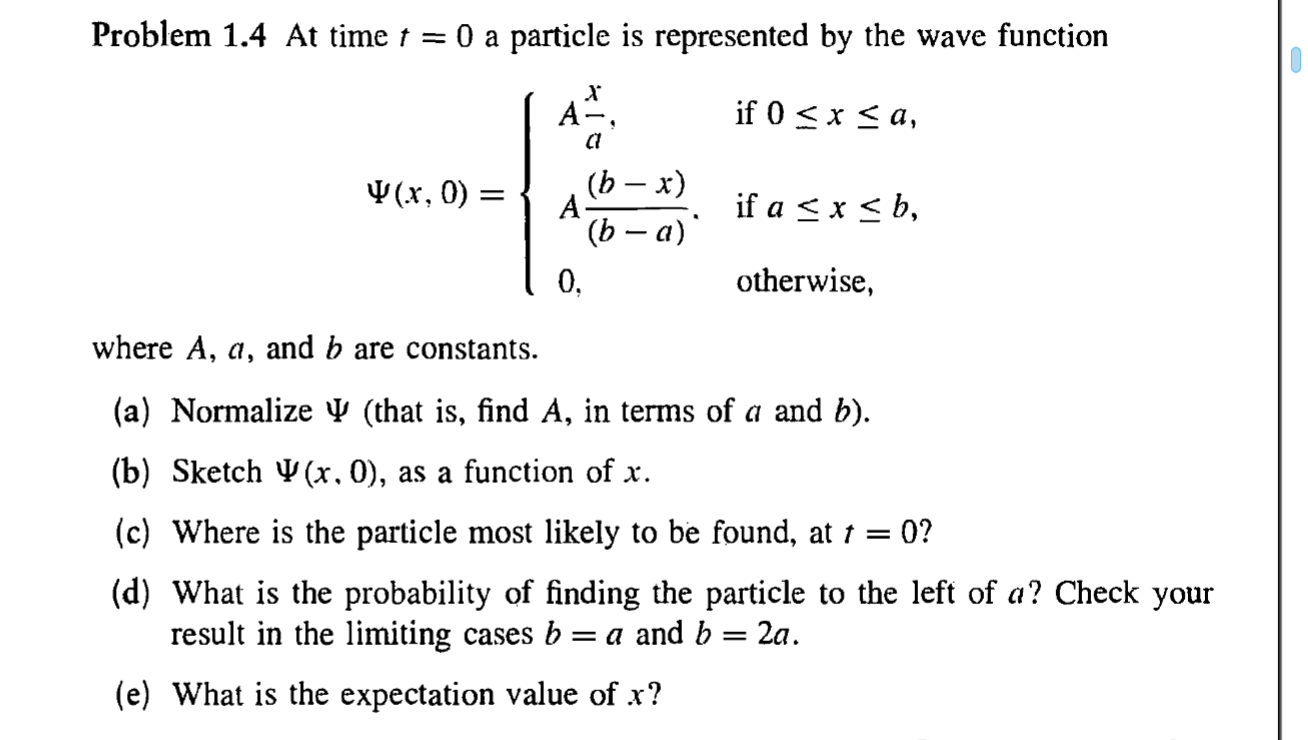

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt




In [131]:
A, a, b = sym.symbols("A a b", real=True, positive=True)
l = sym.symbols("\lambda", nonzero=True, positive=True)
x, w,t = sym.symbols("x \omega t", real=True)

### (a) Normalise $ \Psi $, that is find A in terms of a and b ###

First we set up the problem by defining variables for each piecewise term in the function.  I define variables e1 and e2 as sub expressions for each piecewise term.

In [3]:
e1 = A*x/a; e1

A*x/a

In [4]:
e2 = A * (b-x)/(b-a); e2

A*(b - x)/(-a + b)

Find the integral $ s_1 = \int_0^a e_1^2 dx $

In [5]:
s1 = sym.integrate(e1*e1, (x)); s1

A**2*x**3/(3*a**2)

Find the integral $ s_2 = \int_a^b e_2^2 dx $

In [6]:
s2 = sym.integrate(e2*e2, (x)); s2

A**2*b**2*x/(a**2 - 2*a*b + b**2) - A**2*b*x**2/(a**2 - 2*a*b + b**2) + A**2*x**3/(3*a**2 - 6*a*b + 3*b**2)

In [7]:
# simplify the result
s2 = sym.simplify(s2)
s2

A**2*x*(3*b*(b - x) + x**2)/(3*(a**2 - 2*a*b + b**2))

Now we want to try and computer the normalising constant A by substituting into the respective integrals the value of x at each integration boundary.  We call these s1ab and s2ab respectively for each piecewise term

In [8]:
s1ab = s1.subs(x, a)
s1ab

A**2*a/3

In [27]:
sym.simplify(s2.subs(x, b) - s2.subs(x,a))

A**2*(-a + b)/3

In [62]:
sym.simplify(s2.subs(x, b) -  s2.subs(x,a))

A**2*(-a + b)/3

In [63]:
s2 = sym.simplify(s2)
s2

A**2*x*(3*b*(b - x) + x**2)/(3*(a**2 - 2*a*b + b**2))

In [64]:
s2ab = sym.simplify(s2.subs(x, b) - s2.subs(x,a))

s2ab

A**2*(-a + b)/3

Now combine (sum) the two terms to get a single term we can solve for the normalising constant A

In [65]:
sab = sym.cancel(s1ab + s2ab)
sab

A**2*b/3

Now we use Sympy "solveset" to solve for the normalising constant A ( or me exactly for $A^2$.  Because solveset solves assuming the right hand side is zero, and in our case the right hand side should be one, we have to solve for A using the following formula $ sab-1 = 0 $ .

In [66]:
A2val = sym.solveset(sab-1, A**2)
A2val

{3/b}

In [67]:
A2val = A2val.args[0]


In [68]:
A2val

3/b

Therefore $ A =  \sqrt{ \frac{3}{b}} $ is the normalising constant.

Now we just do a sanity check to make sure that the area under the integral curve is 1

In [69]:
ss = s1ab.subs(A**2, A2val) +s2ab.subs(A**2,A2val); ss

a/b + (-a + b)/b

In [70]:
# Simplify the previous expression and make sure the total area under the curve sums to unity.
sym.cancel(ss)

1

### (b) plot the graph ###

Convert the piecewise functions into python functions that we can plot

In [71]:
Af = sym.lambdify([a,b], sym.sqrt(A2val))

In [72]:
def psi(x, a=1, b=2):
    #print (x,a,b)
    Anorm = Af(a, b)
    if 0 <= x <= a:
        return Anorm * (x)/(a)
    elif a <= x <= b:
        return Anorm*(b-x)/(b-a)
    else:
        return 0

In [73]:
af1 = sym.lambdify([a,b],e1.subs([(A, sym.sqrt(A2val)), (x, a)]))

In [74]:
af2 = sym.lambdify([a,b], (e1*e1).subs([(A**2, A2val), (x, a)]))

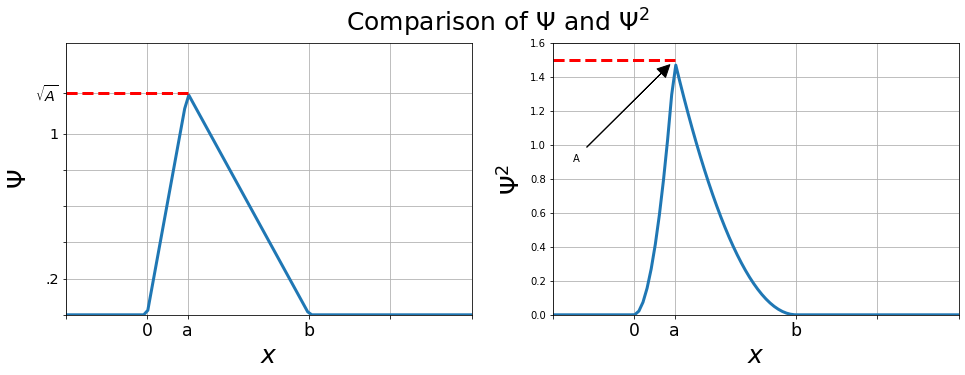

In [76]:
av, bv = (.5,2)
xv = np.linspace(-1,4,100)
y = [psi(x1,av,bv) for x1 in xv]
y2  = [psi(x1, av, bv)**2 for x1 in xv]
fig, axes = plt.subplots(1,2 , figsize=(16,5))
ax = axes[0]
ax.set_xlim(-1,2)
ax.set_ylim(0,1.5)

ax = axes[1]
ax.set_xlim(-1,2)
ax.set_ylim(0,1.6)


apex1 =  af1(av, bv)
apex2 =  af2(av, bv)
fig.suptitle("Comparison of $ \Psi $ and $ \Psi^2 $", fontsize=25)
plt.sca(axes[0])
plt.plot(xv,y, lw=3)
plt.plot((-1, av), (apex1, apex1), 'r--', lw=3)
#plt.title('$ \Psi(x) $', fontsize=20)
plt.yticks([0, .2, .4, .6, .8, apex1, 1],['','.2','','','', '$ \sqrt{A}$', "1"], fontsize = 'x-large')
plt.xticks([-1, 0, 0.5, 2, 3, 4], ['','0', 'a', 'b', '', ''], fontsize='xx-large')
plt.ylabel('$\Psi$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.grid()

plt.sca(axes[1])
plt.plot(xv,y2, lw=3)
plt.plot((-1, av), (apex2, apex2), 'r--', lw=3)
axes[1].annotate('A', xy=(av, apex2), xytext=(-.75, .9),
            arrowprops=dict(facecolor='black', width=.05, shrink=0.05))
#plt.title('$ \Psi(x)^2 $', fontsize=20)
#plt.yticks([0, .2, .4, .6, .8, 1, apex],['','.2','','','','', 'A'], fontsize = 'x-large')
#plt.xticks([-1, 0, 0.5, 2, 3, 4], ['','0', 'a', 'b', '', ''], fontsize='xx-large')
plt.xticks([-1, 0, 0.5, 2, 3, 4], ['','0', 'a', 'b', '', ''], fontsize='xx-large')

plt.ylabel('$\Psi^2$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.grid()

(c) The particle is most likely to be found at point a at x = a because that is where the highest point of the graph is

### (d) What is the probability of finding the particle to the left of a? ###

To work this out we just use the first piecewise term (e1) and try to find the area under the curve up to x = a

In [41]:
A2val 

3/b

In [42]:
Asym = sym.sqrt(A2val)
Asym  # The normalising constant 

sqrt(3)/sqrt(b)

In [43]:
sym.integrate((e1*e1).subs(A, Asym), (x, 0, a))

a/b

In [44]:
sym.simplify(_) # This tells us the probability of finding the particle to the left of a

a/b

In [45]:
sym.integrate((e1*e1).subs(A, Asym), x)

x**3/(a**2*b)

In [46]:
# The integral of the first time is more obvious but we try to get the computer to work the second part for a ≤ x ≤ b
s = sym.integrate((e2*e2).subs(A, Asym), (x,a, b))
sym.simplify(s)

(-a + b)/b

The area under the curve in each case we can write as:

$$  \int \Psi^2 (x,0) \, dx = \begin{cases} \displaystyle
    \sqrt{ \frac{3}{b} } \frac{1}{a} \int_0^a x^2 dx =  \frac{a}{b} , \; \mathrm{ if } \; 0 \leq x \leq a \\
\\
   \sqrt{\frac{3}{b} }\int_a^b \frac{(b-x)^2}{(b-a)^2}\, dx =  \frac{b-a}{b} \; \mbox{if} \; a \leq x \leq b
\end{cases} 
$$


Let's do a quick sanity check that the above integral total is equal to unity

In [77]:
s10 = sym.integrate((e1*e1).subs(A, Asym), x); s10

x**3/(a**2*b)

In [78]:
s11 = sym.integrate((e2*e2).subs(A, Asym), x); s11

3*b*x/(a**2 - 2*a*b + b**2) + x**3/(a**2*b - 2*a*b**2 + b**3) - 3*x**2/(a**2 - 2*a*b + b**2)

In [79]:
s10ab = ((s10).subs(x, a))
s10ab

a/b

In [80]:
s11ab = sym.simplify(s11.subs(x, b) - s11.subs(x,a))
s11ab

(-a + b)/b

In [81]:
sym.simplify(s10ab + s11ab)

1

If x = a  then the $ Pr(x \leq a) = \frac{a}{b} $

### (e) What is the expectation value of x ? ###

The following is the expression for the probability density $ \rho (x) $

The expectation value $ <x> = \int x \rho (x) dx $ but we have to do it in two pieces.  That is $ <x> = \int_0^a x \rho(x) dx + \int_a^b x \rho(x) dx $.

In [88]:
first_part = sym.integrate(x*e1*e1,(x,0,a)).subs(A, Asym)
first_part

3*a**2/(4*b)

In [92]:
second_part = sym.simplify( sym.integrate(x*e2*e2, (x,a,b)).subs(A, Asym))
(second_part)

-3*a**2/(4*b) + a/2 + b/4

In [93]:
first_part + second_part

a/2 + b/4

Therefore $ < x > = \frac{a}{2} + \frac{b}{4} $

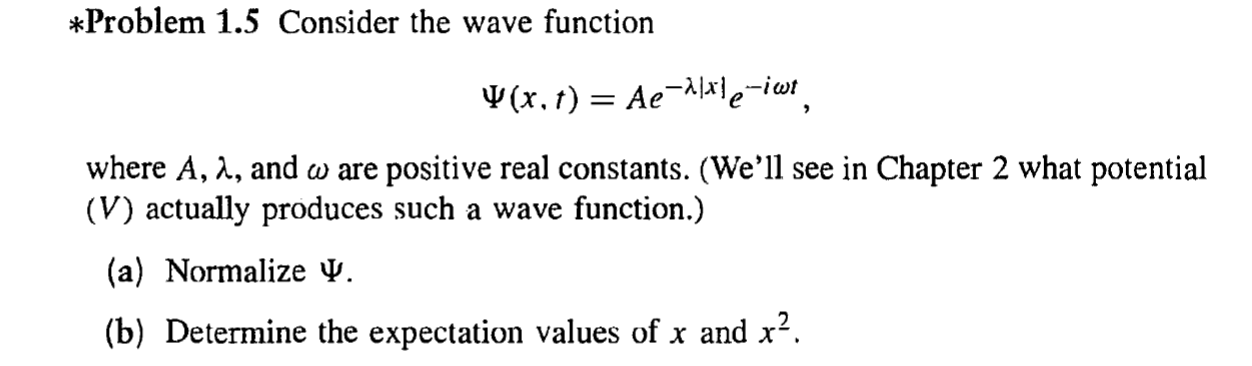

In [213]:
e1 = A*sym.exp(-l*sym.Abs(x))*sym.exp(sym.I*w*t); e1

A*exp(-\lambda*Abs(x))*exp(I*\omega*t)

In [144]:
e_positive = A*sym.exp(-l*x)*sym.exp(sym.I*w*t)
e_positive

A*exp(-\lambda*x)*exp(I*\omega*t)

In [146]:
e_negative = A*sym.exp(l*x)*sym.exp(sym.I*w*t)
e_negative

A*exp(\lambda*x)*exp(I*\omega*t)

In [198]:
Aval = sym.solveset(ipos + ineg - 1, A, sym.Interval(0, sym.oo))
Aval

{sqrt(\lambda)}

Therefore $ A = \sqrt{ \lambda } $

### (b) Determine the expectation values of $ <x> $ and $ <x^2> $ ###

In [203]:
epos = e_positive.subs(A, Aval.args[0]); epos

sqrt(\lambda)*exp(-\lambda*x)*exp(I*\omega*t)

In [204]:
eneg = e_negative.subs([(A, Aval.args[0])]); eneg


sqrt(\lambda)*exp(\lambda*x)*exp(I*\omega*t)

In [205]:
ineg = sym.integrate((x)*eneg*sym.conjugate(eneg),(x, -sym.oo, 0)); ineg

-1/(4*\lambda)

In [206]:
ipos = sym.integrate(x*epos*sym.conjugate(epos),(x, 0, sym.oo)); ipos

1/(4*\lambda)

In [207]:
# The expected value <x> = ineg + ipos
ineg + ipos

0

In [208]:
ineg2 = sym.integrate((x**2)*eneg*sym.conjugate(eneg),(x, -sym.oo, 0)); ineg2

1/(4*\lambda**2)

In [209]:
ipos2 = sym.integrate(x**2*epos*sym.conjugate(epos),(x, 0, sym.oo)); ipos2

1/(4*\lambda**2)

In [212]:
# Now calculate the value for <x²>
ineg2 + ipos2

1/(2*\lambda**2)

In [214]:
e1 = A*sym.exp(-l*sym.Abs(x)); e1

A*exp(-\lambda*Abs(x))

In [219]:
Aval.args[0]

sqrt(\lambda)

In [221]:
e2 = (e1*e1).subs(A, Aval.args[0]); e2

\lambda*exp(-2*\lambda*Abs(x))

In [227]:
e2lambda = sym.lambdify([x, l],e2)

In [228]:
e2lambda(0,1)

1.0

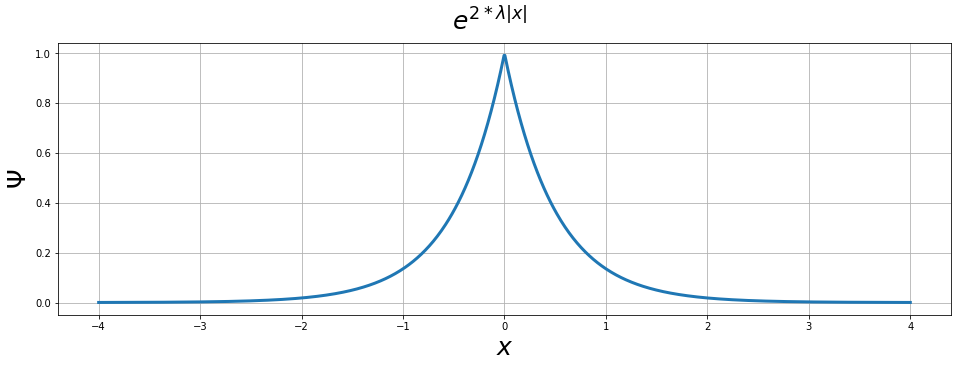

In [237]:
lval = 1
xv = np.linspace(-4,4,1000)
y = [e2lambda(x1,lval) for x1 in xv]

fig = plt.figure(figsize=(16,5))

fig.suptitle("$ e^{2*\lambda | x|}  $", fontsize=25)

plt.plot(xv,y, lw=3)
#plt.plot((-1, av), (apex1, apex1), 'r--', lw=3)
#plt.title('$ \Psi(x) $', fontsize=20)
#plt.yticks([0, .2, .4, .6, .8, apex1, 1],['','.2','','','', '$ \sqrt{A}$', "1"], fontsize = 'x-large')
#plt.xticks([-1, 0, 0.5, 2, 3, 4], ['','0', 'a', 'b', '', ''], fontsize='xx-large')
plt.ylabel('$\Psi$', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.grid()

